In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Sandra Kimiring\OneDrive\Desktop\HOUSE PRICING\housing.csv"
)

In [7]:
df_housing=data.copy()

In [8]:
# Show the head of the dataFrame 
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Check info
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
## Some statistics on data 
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
## check nulls of data 
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
# Explore the column ocean_proximity
ocean_values = df_housing["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

C:\Users\Sandra Kimiring\AppData\Local\Temp\ipykernel_2784\4251902447.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = ocean_values[i]


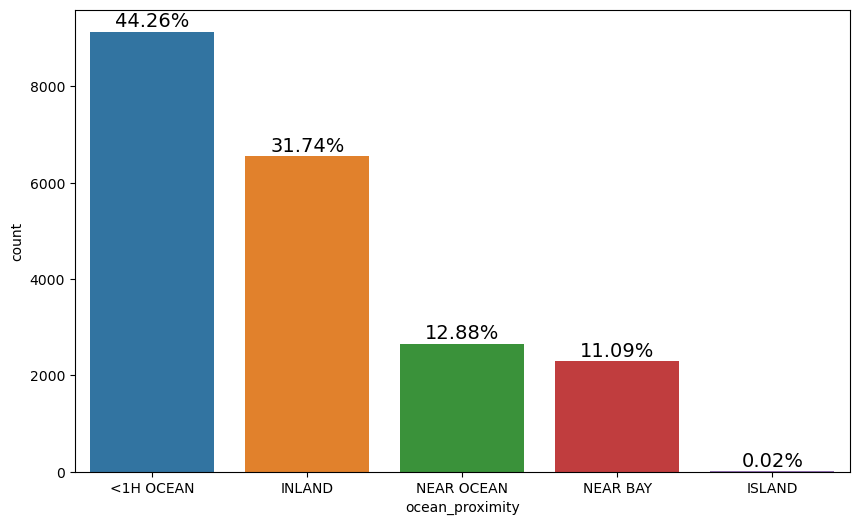

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x = "ocean_proximity",data=df_housing,order=ocean_values.index)

# showing the percenotge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i] 
    strt='{:0.2f}%'.format(100*count / df_housing.shape[0]) 
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14) 

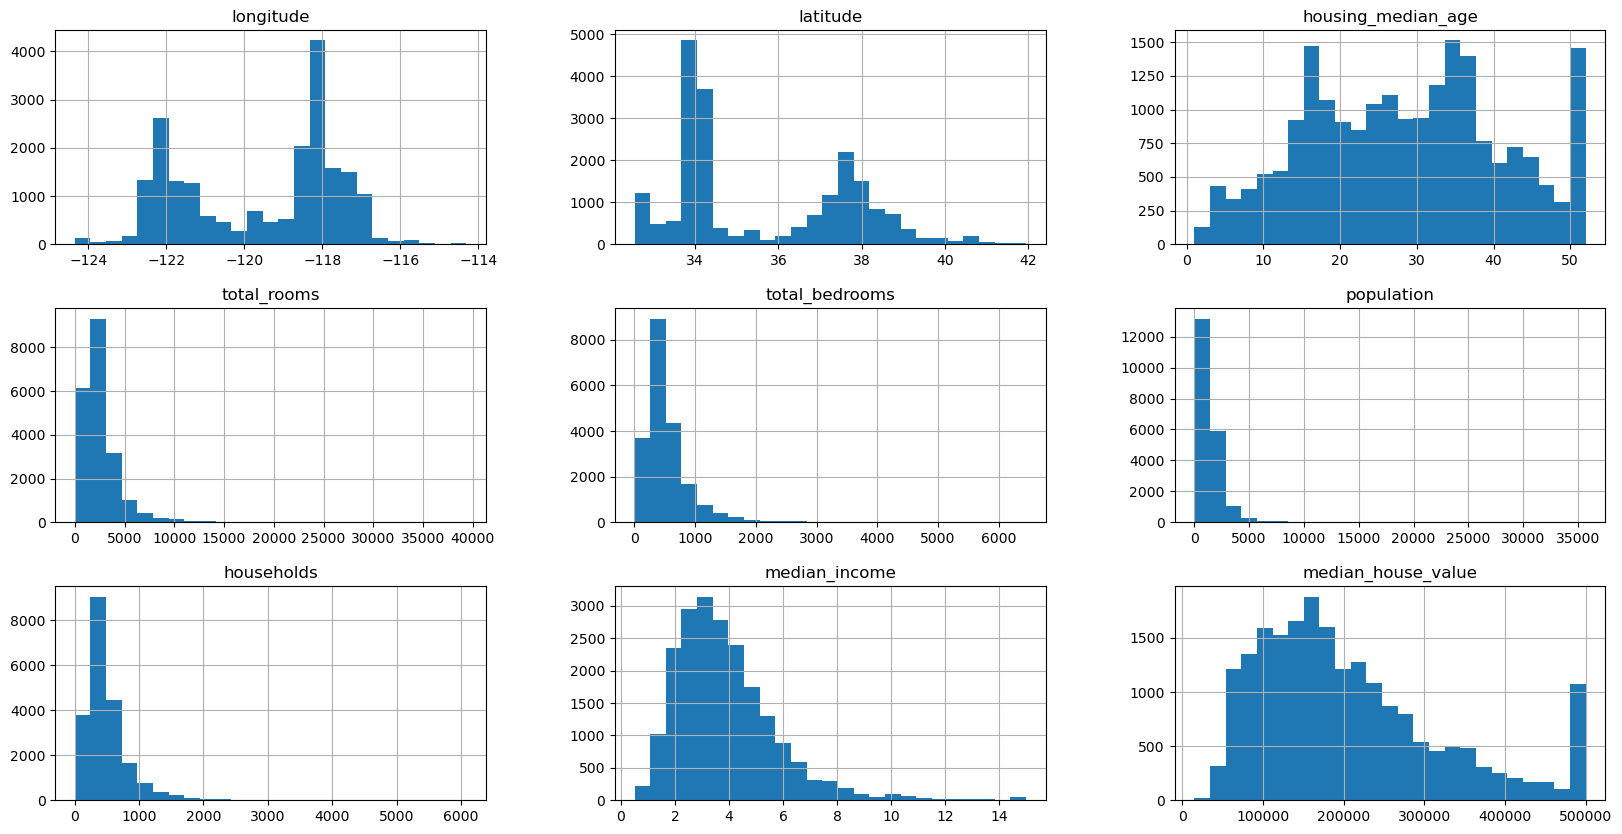

In [14]:
# Histogram
df_housing.hist(bins=25,figsize=(20,10));

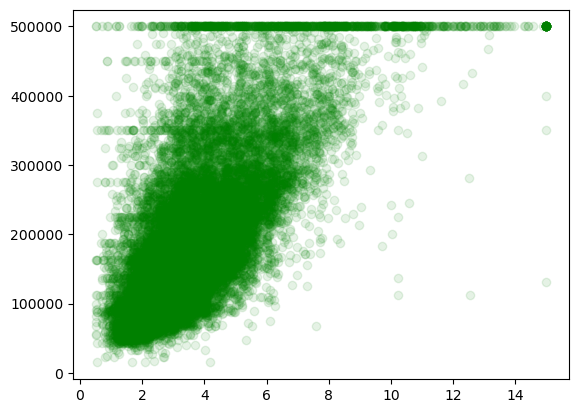

In [15]:
# check scatter plot between median_income and median_house_value
plt.scatter(df_housing["median_income"],df_housing["median_house_value"], alpha=0.1,color="g")

In [16]:
## Try to make median_income into bins
income_bins = pd.cut(df_housing["median_income"],
                     bins=[0,1.5,3,4.5,6,np.inf],
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])

C:\Users\Sandra Kimiring\anaconda777\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='median_income', ylabel='count'>

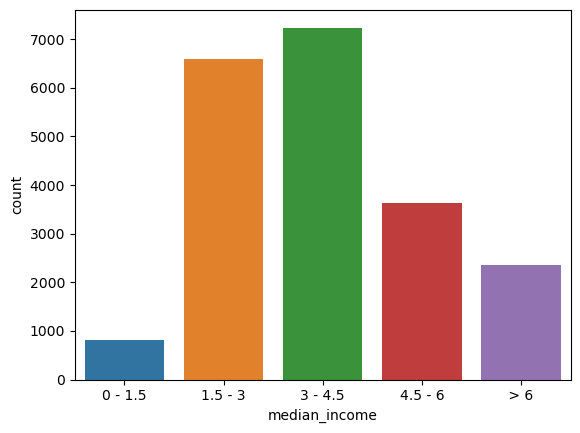

In [17]:
sns.countplot(x = income_bins)

C:\Users\Sandra Kimiring\anaconda777\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


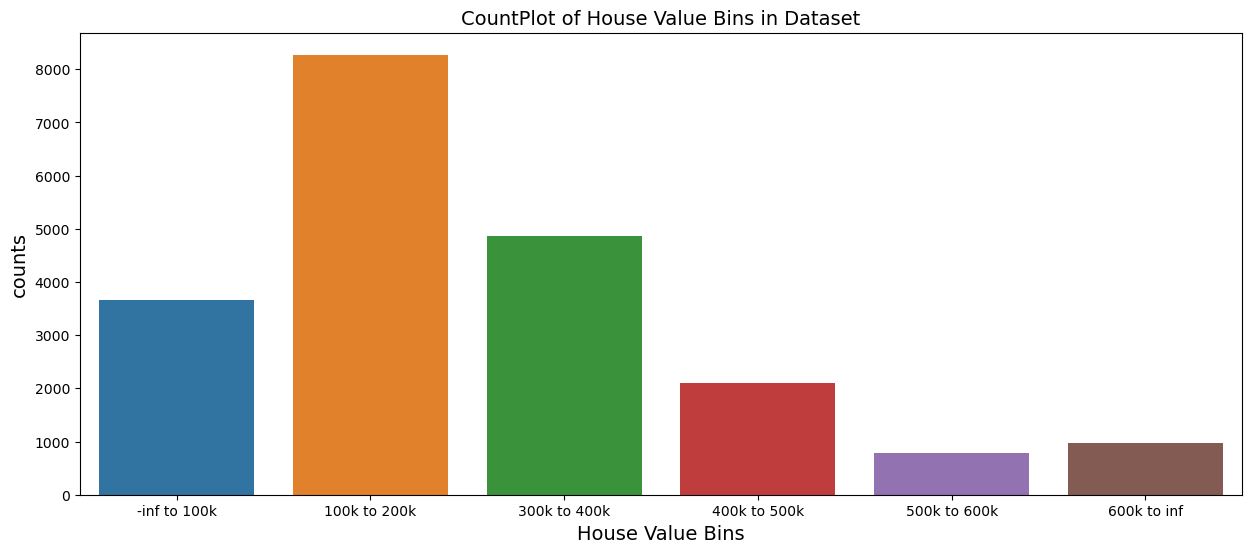

In [18]:
## Try for (median_house_vaLue) to convert it to chunks (bins) 
## Cut this numericaL feature to categorical for its vaLues to be in range will be in the some category 
## In the foLLowing example -- any value between range (0-100k) will be the same category,I name it (0-100k) 

house_value_bins = pd.cut(x=df_housing["median_house_value"],
                          bins=(-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf),
                                labels=('-inf to 100k', '100k to 200k', '300k to 400k', '400k to 500k', '500k to 600k', '600k to inf') )
## countpLot for the above chunks 
plt.figure(figsize=(15,6)) 
sns.countplot(x=house_value_bins) 
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k') 
plt.xlabel('House Value Bins', fontsize=14, c='k') 
plt.ylabel('counts', fontsize=14,c='k') 
plt.show() 

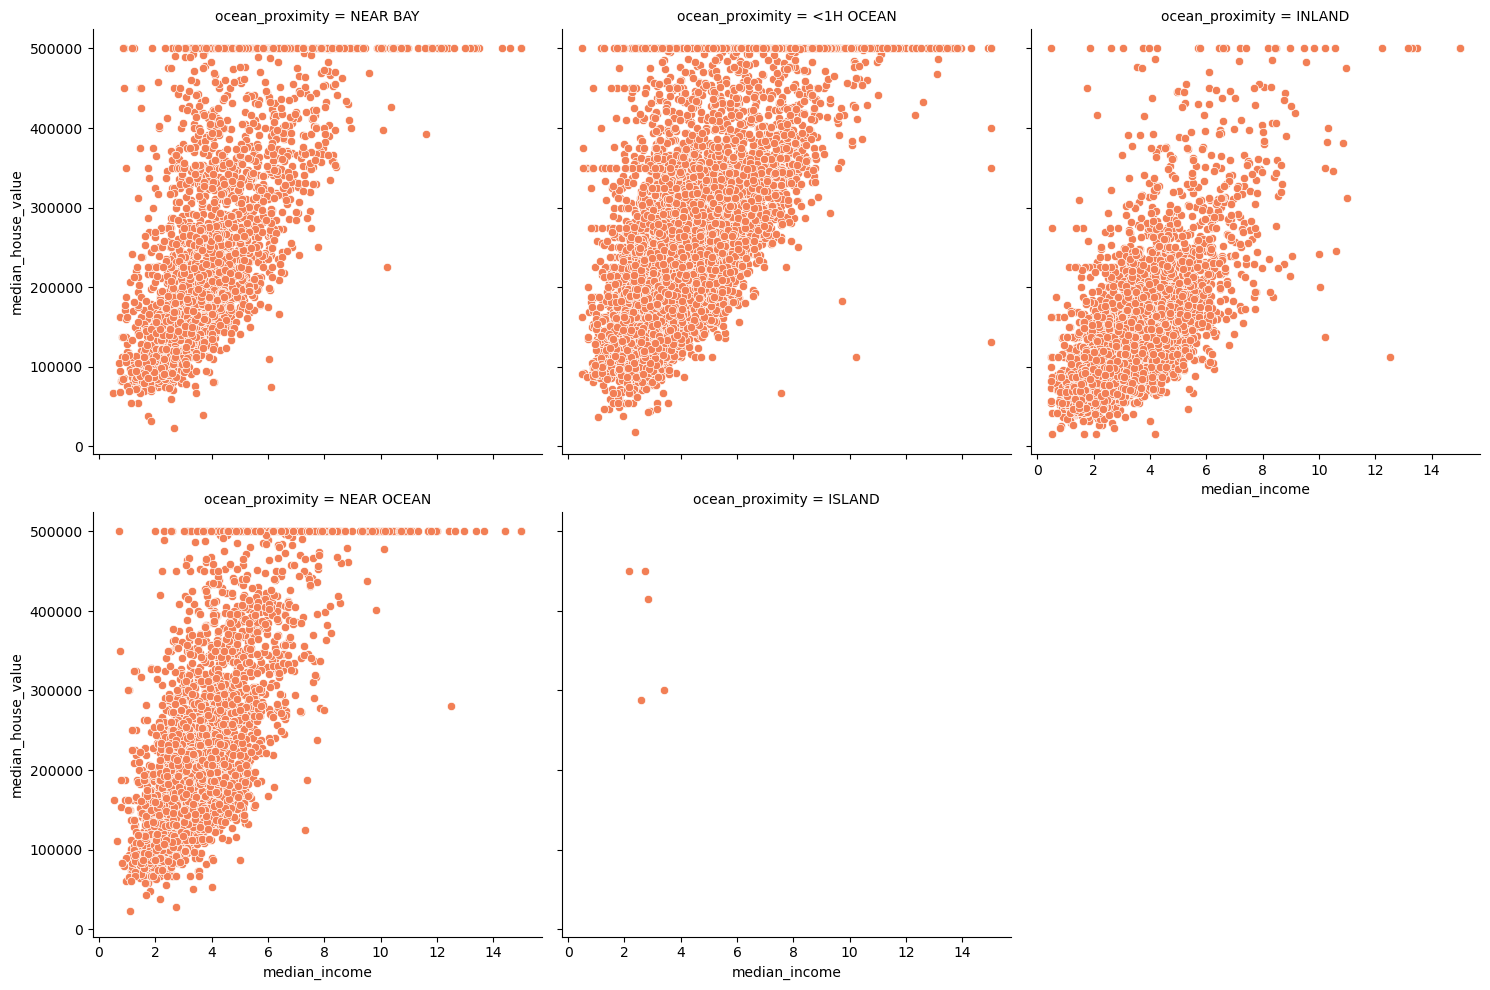

In [19]:
# Scatter plot between median_income and median_house_value at each ocean_proximity
sns.relplot(x="median_income",y='median_house_value',data=df_housing,col="ocean_proximity",col_wrap=3,color="#F27F55")

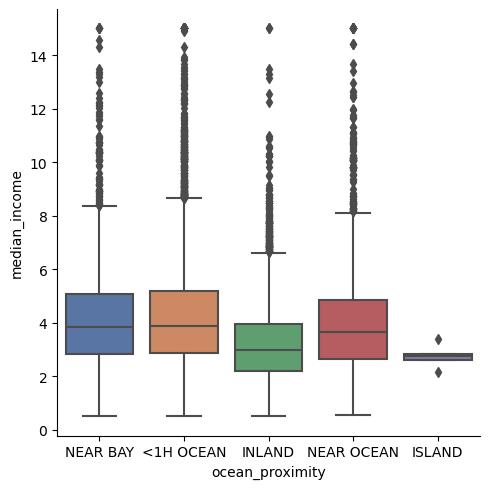

In [20]:
## Boxplot between ocean_proximity and median_income
sns.catplot(x='ocean_proximity',y="median_income",kind='box',data=df_housing,palette='deep');

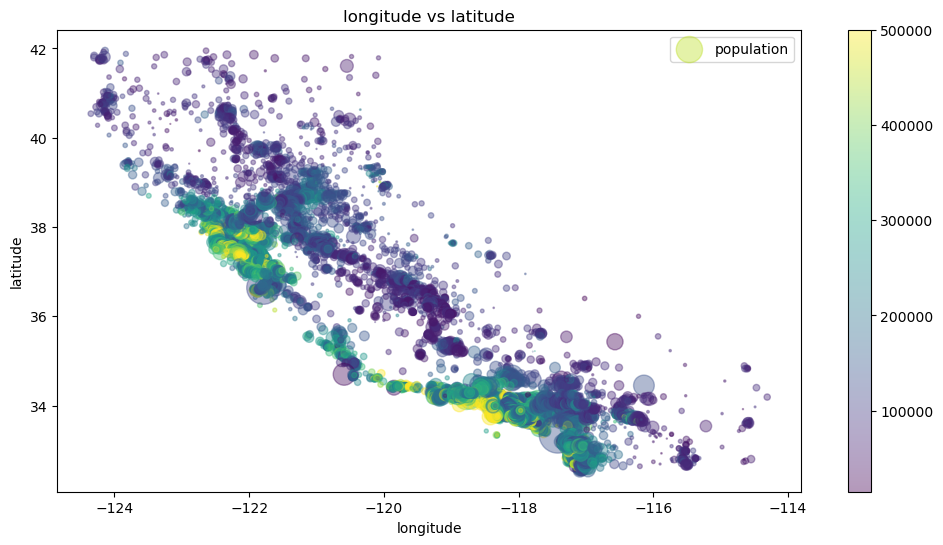

In [21]:
# Scatter plot between longitude and latitude
plt.figure(figsize=(12,6))
sc = plt.scatter(df_housing["longitude"],
                 df_housing["latitude"],
                 alpha=0.4,
                 cmap="viridis",
                 c=df_housing["median_house_value"],
                s=df_housing["population"]/50,
                label='population')
plt.colorbar(sc)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("longitude vs latitude")
plt.legend()
plt.show()

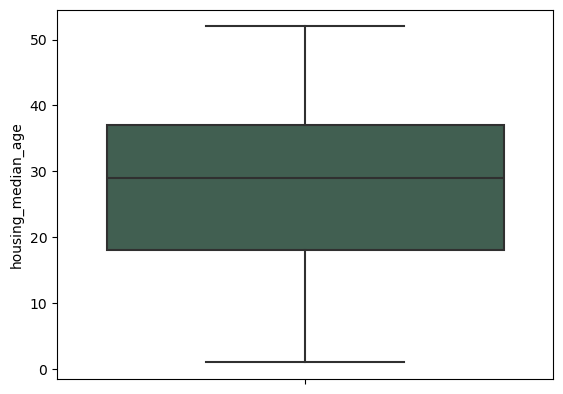

In [22]:
# Boxplot for the housing_median_age to check the outliers
sns.boxplot(y="housing_median_age",data=df_housing,color="#3C6451");

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

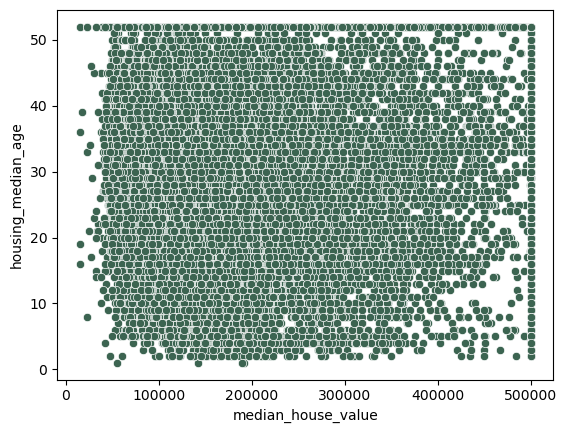

In [23]:
# scatterplot for the housing_median_age with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(x='median_house_value',y="housing_median_age",data=df_housing,color='#3C6451')

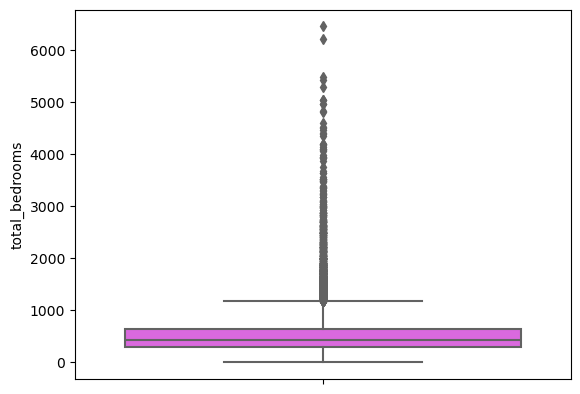

In [24]:
# Boxplot for the total_bedrooms to check the outliers
sns.boxplot(y="total_bedrooms",data=df_housing,color="#EC55F2");

<Axes: xlabel='total_bedrooms', ylabel='median_house_value'>

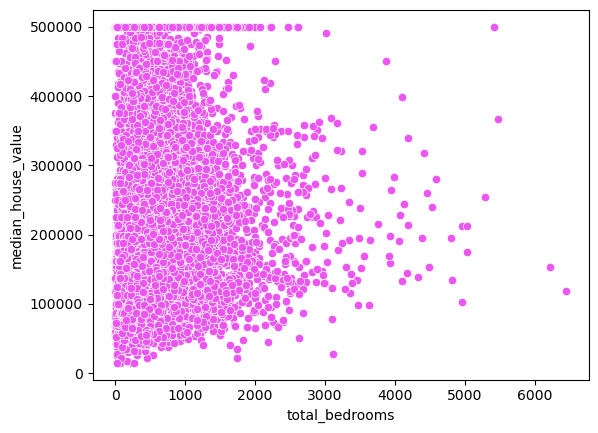

In [25]:
# scatterplot for the total_bedrooms with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="total_bedrooms",data=df_housing,color='#EC55F2')

In [26]:
# Fill the null values in total bedrooms column by random
Fill_total_bedrooms=df_housing["total_bedrooms"].dropna().unique()
df_housing['total_bedrooms'] = df_housing['total_bedrooms'].fillna(pd.Series(np.random.choice(Fill_total_bedrooms,size=len(df_housing.index))))

In [27]:
# it seems from the scatter plot to delete from the total_bedrooms column the values higher than 5000 as outliers
df_housing = df_housing[df_housing["total_bedrooms"]<=5000]

<Axes: ylabel='households'>

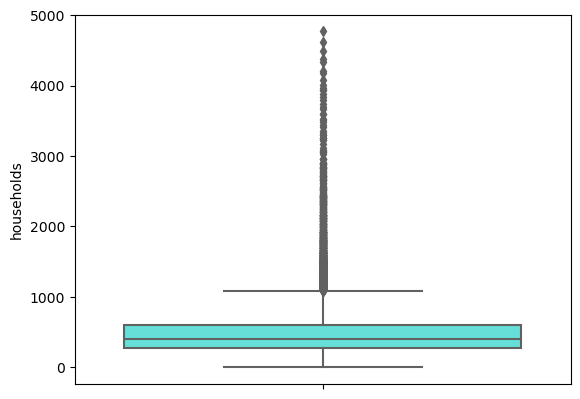

In [28]:
# Boxplot for the households to check the outliers
sns.boxplot(y="households",data=df_housing,color="#51F3E8")

<Axes: xlabel='households', ylabel='median_house_value'>

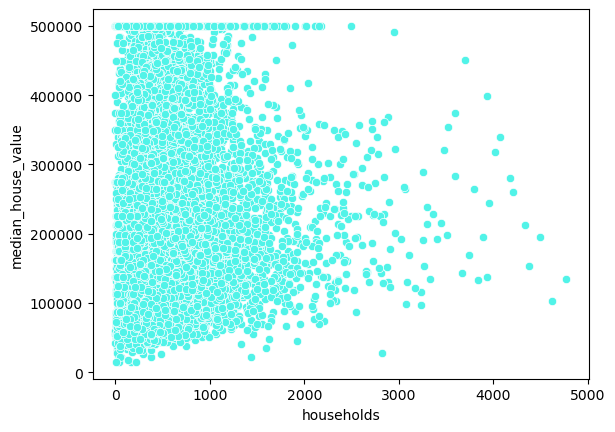

In [29]:
# scatterplot for the households with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="households",data=df_housing,color='#51F3E8')

In [30]:
# it seems from the scatter plot to delete from the households column the values higher than 4000 as outliers
df_housing = df_housing[df_housing["households"]<=4400]

<Axes: ylabel='population'>

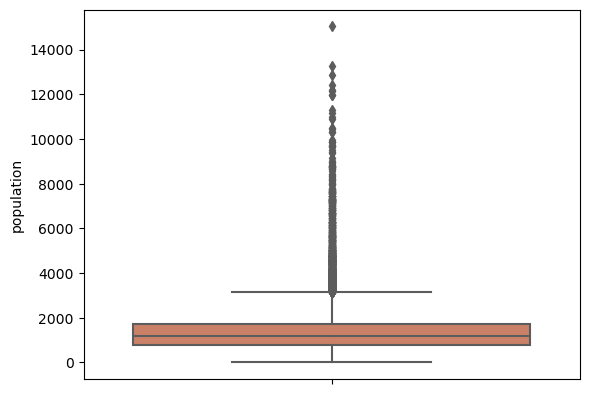

In [31]:
# Boxplot for the population to check the outliers
sns.boxplot(y="population",data=df_housing,color='#DB7958')

<Axes: xlabel='population', ylabel='median_house_value'>

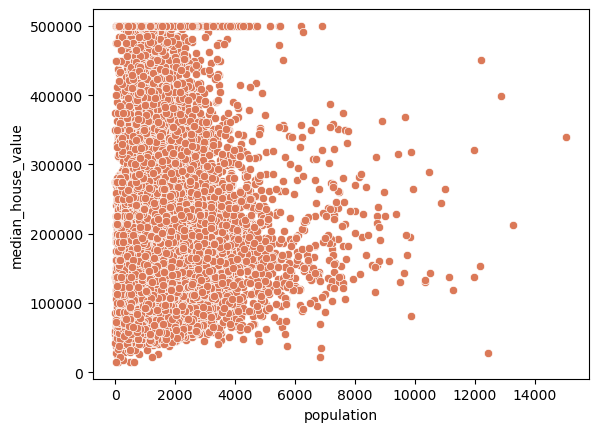

In [32]:
# scatterplot for the housing_median_age with population to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="population",data=df_housing,color='#DB7958')

In [33]:
# it seems from the scatter plot to delete from the population column the values higher than 10000 as outliers
df_housing = df_housing[df_housing["population"]<10000]

<Axes: ylabel='median_income'>

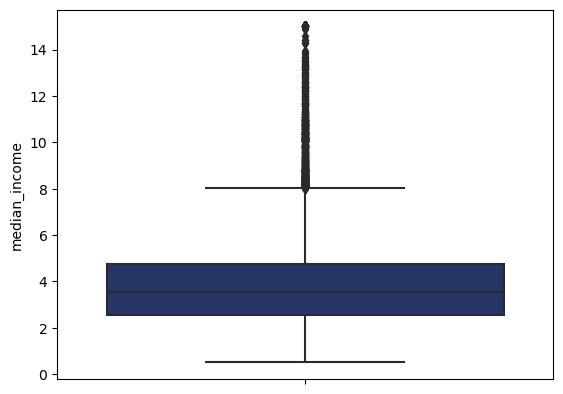

In [34]:
# Boxplot for the median_income to check the outliers
sns.boxplot(y="median_income",data=df_housing,color='#1D3070')

<Axes: xlabel='median_income', ylabel='median_house_value'>

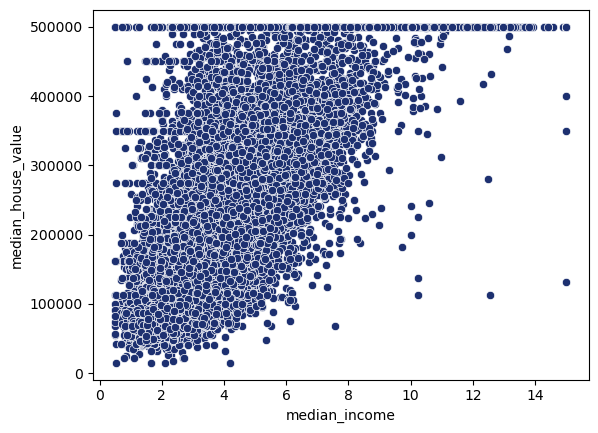

In [35]:
# scatterplot for the median_income with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="median_income",data=df_housing,color='#1D3070')

In [36]:
# it seems from the scatter plot to delete from the median_income column the values higher than 10 as outliers
df_housing = df_housing[df_housing["median_income"]<=12]

In [37]:
# covert the column ocean_proximity to numeric by labelencoder
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df_housing['ocean_proximity'] = l.fit_transform(df_housing['ocean_proximity'])

In [38]:
#PREDICTION PART

In [39]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [40]:
house = df_housing[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity',]]

In [41]:
# split the data to x and y
# y is 1 column contain the values is the target
# x contain the values of the rest of columns
x = house.drop(["median_house_value"],axis=1).values
y= house['median_house_value'].values

In [42]:
# import the train_test_split
from sklearn.model_selection import train_test_split

In [43]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [44]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [45]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [46]:
reg.score(x_train,y_train)

0.5732284100560134

In [47]:
reg.score(x_test,y_test)

0.577945391875367

In [48]:
reg.intercept_

189009.58164647126

In [49]:
reg.coef_

array([ 34744.02927067, -33900.91401881,  15893.19516035, -39393.05602084,
        64319.29960209, 109346.96712542,   4337.79235317])

In [50]:
pd.DataFrame(reg.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,34744.029271
total_rooms,-33900.914019
total_bedrooms,15893.195160
population,-39393.056021
households,64319.299602
median_income,109346.967125
median_house_value,4337.792353


In [51]:
y_pred_1 = reg.predict(x_test)

In [100]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [101]:
df_1.head()

,y_test,Y_pred
0,94600.0,205988.343814
1,60000.0,130932.766223
2,200000.0,125066.255091
3,331900.0,274847.996661
4,458300.0,280062.731968


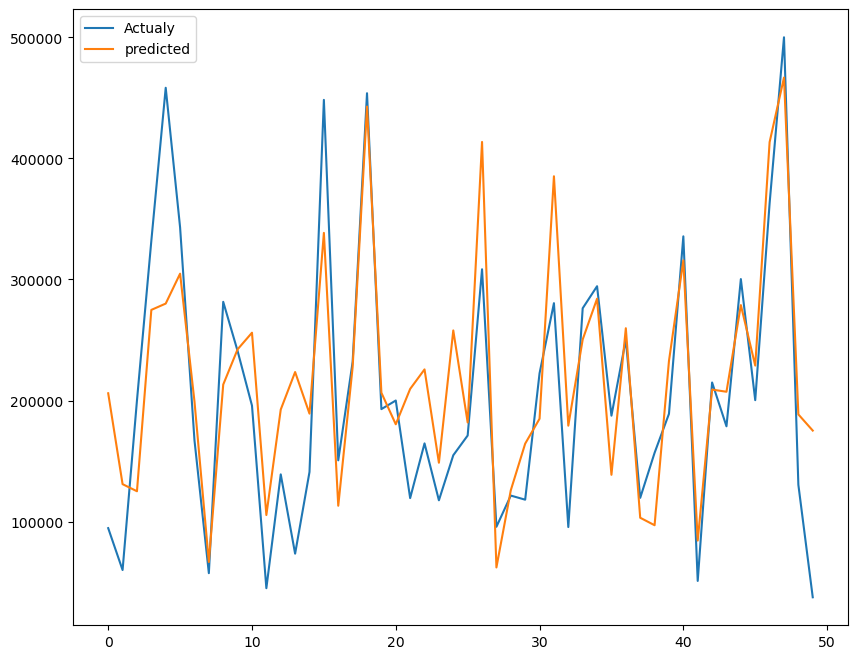

In [102]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actualy","predicted"]);

In [57]:
from sklearn import linear_model
rid = linear_model.Ridge(alpha=0.9)
rid.fit(x_train,y_train)

Ridge(alpha=0.9)

In [58]:
rid.score(x_train,y_train)

0.5732283720284073

In [59]:
rid.intercept_

189011.1944117719

In [60]:
rid.coef_

array([ 34741.31381781, -33865.85140013,  15901.46119611, -39370.77858915,
        64254.29726781, 109327.2041754 ,   4338.51914874])

In [61]:
pd.DataFrame(rid.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,34741.313818
total_rooms,-33865.851400
total_bedrooms,15901.461196
population,-39370.778589
households,64254.297268
median_income,109327.204175
median_house_value,4338.519149


In [62]:
y_pred_2 = rid.predict(x_test)

In [63]:
df_2 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_2})

In [64]:
df_2.head()

,y_test,Y_pred
0,94600.0,205990.650330
1,60000.0,130950.989118
2,200000.0,125081.883783
3,331900.0,274841.795032
4,458300.0,280001.335370


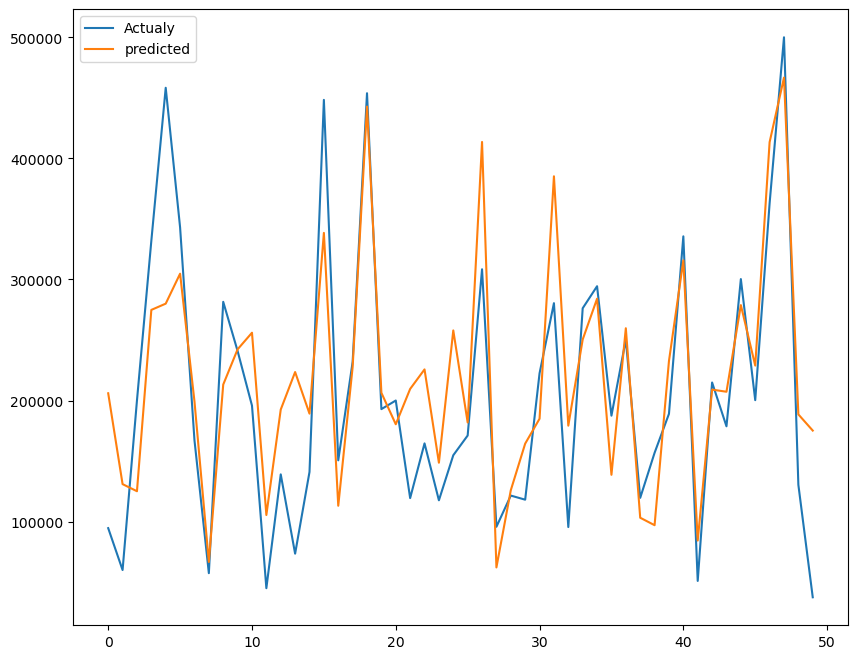

In [65]:
plt.figure(figsize=(10,8))
plt.plot(df_2[:50])
plt.legend(["Actualy","predicted"]);

In [66]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=0.9)
lass.fit(x_train,y_train)

Lasso(alpha=0.9)

In [67]:
lass.score(x_train,y_train)

0.5732284071672302

In [68]:
lass.score(x_test,y_test)

0.5779446935977435

In [69]:
lass.intercept_

189010.1572285115

In [70]:
lass.coef_

array([ 34742.66584432, -33889.66145553,  15888.90154588, -39386.9707762 ,
        64306.27927027, 109342.06897888,   4337.63332412])

In [71]:
pd.DataFrame(lass.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,34742.665844
total_rooms,-33889.661456
total_bedrooms,15888.901546
population,-39386.970776
households,64306.279270
median_income,109342.068979
median_house_value,4337.633324


In [72]:
y_pred_3 = lass.predict(x_test)

In [73]:
df_3 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_3})

In [74]:
df_3.head()

,y_test,Y_pred
0,94600.0,205989.523972
1,60000.0,130937.503398
2,200000.0,125069.609235
3,331900.0,274848.240813
4,458300.0,280042.128745


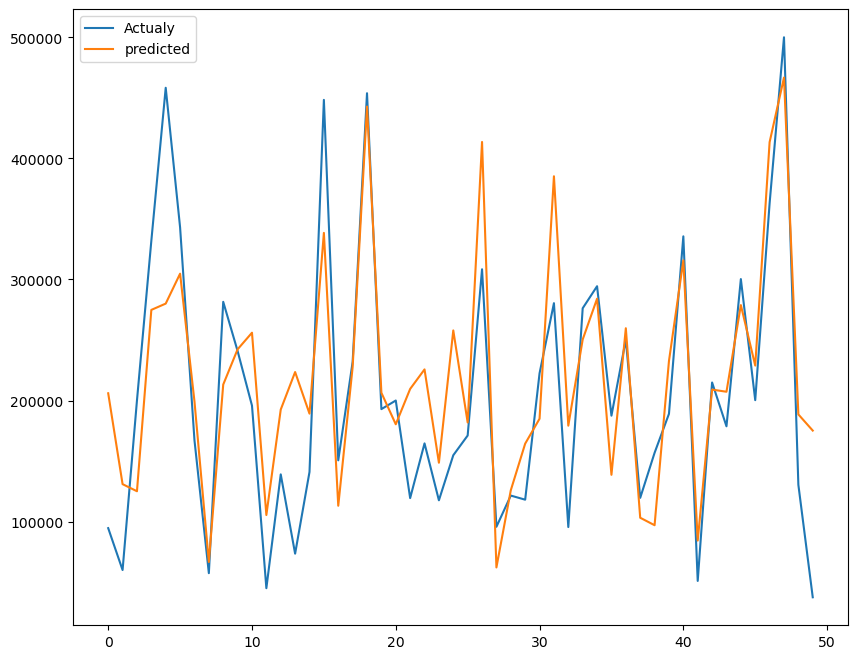

In [75]:
plt.figure(figsize=(10,8))
plt.plot(df_3[:50])
plt.legend(["Actualy","predicted"]);

In [76]:
#import r2_score 
from sklearn.metrics import r2_score

In [77]:
# calculate r2_score for the model
reg_score = r2_score(y_test,y_pred_1)

In [78]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-reg_score)*(n-1)/(n-p-1)
adj_r2

0.5777531243850069

In [79]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < reg_score

True

In [80]:
# import mean_absolute_error and mean_absolute_percentage_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [81]:
# calculate mean_squared_error
mse = mean_squared_error(y_test , y_pred_1)
mse

5538015736.0735

In [82]:
# calculate mean_absolute_error
mae = mean_absolute_error(y_test , y_pred_1)
mae

55421.21967072958

In [83]:
# calculate mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test , y_pred_1)
mape

0.3489465289309794

In [84]:
# calculate root_mean_squared_error
reg_mse = mean_squared_error(y_test , y_pred_1)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

74417.84554845362

In [85]:
# calculate r2_score for the model
rid_score = r2_score(y_test,y_pred_2)
rid_score

0.5779385920344793

In [86]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-rid_score)*(n-1)/(n-p-1)
adj_r2

0.5777463214464434

In [87]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < rid_score

True

In [88]:
# calculate mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_mse

5538104960.607753

In [89]:
# calculate mean_absolute_error
rid_mae = mean_absolute_error(y_test , y_pred_2)
rid_mae

55421.717907139464

In [90]:
# calculate mean_absolute_percentage_error
rid_mape = mean_absolute_percentage_error(y_test , y_pred_2)
rid_mape

0.34896181322404257

In [91]:
# calculate root_mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_rmse = np.sqrt(reg_mse)
rid_rmse

74417.84554845362

In [92]:
# calculate r2_score for the model
lass_score = r2_score(y_test,y_pred_3)

In [93]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-lass_score)*(n-1)/(n-p-1)
adj_r2

0.5777524257892822

In [94]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < lass_score

True

In [95]:
# calculate mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_mse

5538024898.566677

In [96]:
# calculate mean_absolute_error
lass_mae = mean_absolute_error(y_test , y_pred_3)
lass_mae

55421.28902686504

In [97]:
# calculate mean_absolute_percentage_error
lass_mape = mean_absolute_percentage_error(y_test , y_pred_3)
lass_mape

0.34894945173893516

In [98]:

lass_mse = mean_squared_error(y_test , y_pred_3)
lass_rmse = np.sqrt(reg_mse)
lass_rmse

74417.84554845362

In [99]:
models = ["Linear","Ridge","Lasso"]
data = [[reg_score,reg_mse],[rid_score,rid_mse],[lass_score,lass_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Linear,0.577945,5.538016e+09
Lasso,0.577945,5.538025e+09
Ridge,0.577939,5.538105e+09
